## Part 1 : EDA and data preprocessing

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_walmart = pd.read_csv("Walmart_Store_sales.csv")
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [3]:
print(f"Number of rows : {df_walmart.shape[0]}")

Number of rows : 150


In [4]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [5]:
df_walmart.describe(include  = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [6]:
print("Percentage of missing values: ")
display(100 * df_walmart.isna().sum() / df_walmart.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

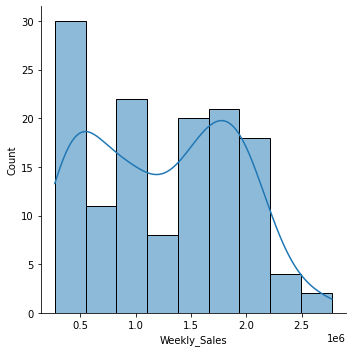

In [14]:
# distribution of Weekly_Sales
sns.displot(df_walmart.Weekly_Sales, kde = True)

In [11]:
df_walmart["Weekly_Sales_log"] = np.log10(df_walmart.Weekly_Sales)
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000,136.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430,6.021669
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173,0.276137
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,5.429638
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500,5.781799
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000,6.100857
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000,6.256811
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,6.442699


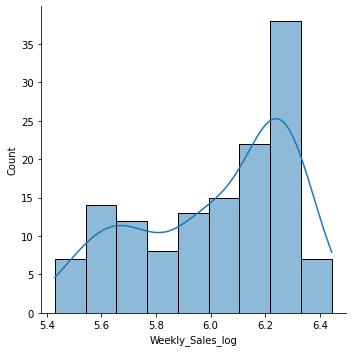

In [15]:
# distribution of Weekly_Sales_log
sns.displot(df_walmart.Weekly_Sales_log, kde = True)

In [18]:
df_walmart["Store"] = df_walmart["Store"].astype(str)
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store             150 non-null    object 
 1   Date              132 non-null    object 
 2   Weekly_Sales      136 non-null    float64
 3   Holiday_Flag      138 non-null    float64
 4   Temperature       132 non-null    float64
 5   Fuel_Price        136 non-null    float64
 6   CPI               138 non-null    float64
 7   Unemployment      135 non-null    float64
 8   Weekly_Sales_log  136 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.7+ KB


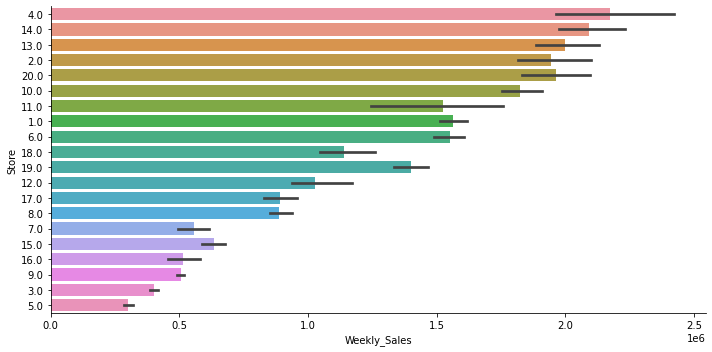

In [25]:
sns.catplot(x="Weekly_Sales",
            y="Store",
            data=df_walmart.sort_values('Weekly_Sales', ascending= False),
            kind="bar",
            height=5,
            aspect=2)

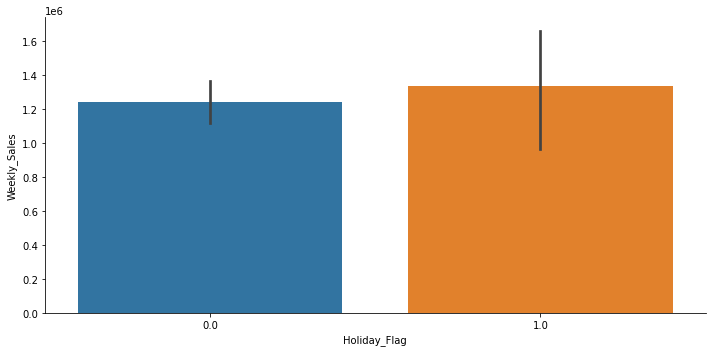

In [17]:
sns.catplot(x="Holiday_Flag",
            y="Weekly_Sales",
            data=df_walmart,
            kind="bar",
            height=5,
            aspect=2)

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

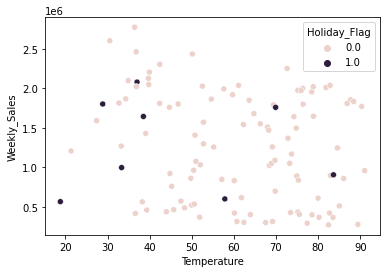

In [20]:
sns.scatterplot(x="Temperature",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

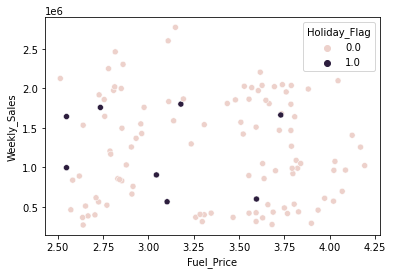

In [21]:
sns.scatterplot(x="Fuel_Price",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

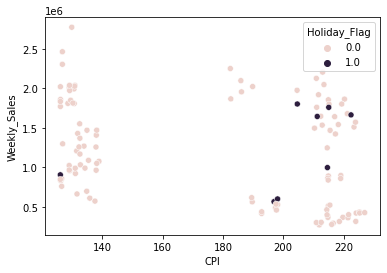

In [22]:
sns.scatterplot(x="CPI",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

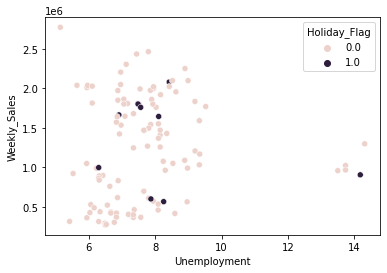

In [23]:
sns.scatterplot(x="Unemployment",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

Drop lines where target values are missing 

In [23]:
df_walmart.drop(columns="Weekly_Sales_log", inplace=True)

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

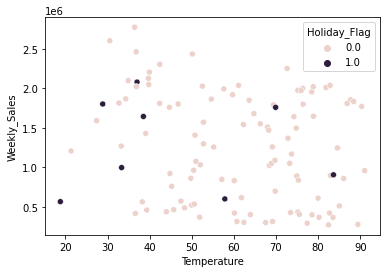

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

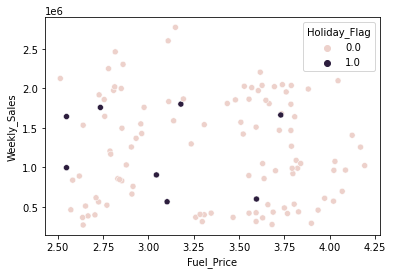

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

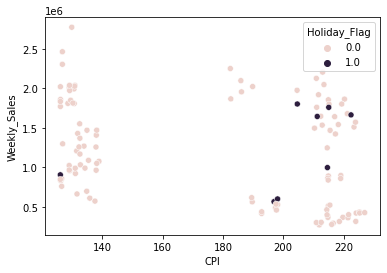

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

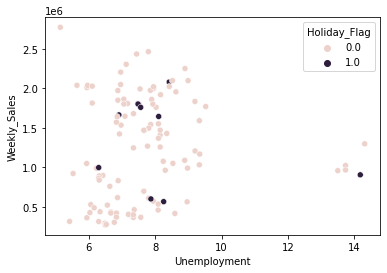